In [8]:
import torch
from torch import nn,optim
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

batch_size = 12
train_data = datasets.MNIST('./datasets', train=True, download=True, transform=transforms.ToTensor() )
test_data = datasets.MNIST('./datasets', train=False, download=True, transform=transforms.ToTensor() )

train_loader = torch.utils.data.DataLoader(train_data,batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,batch_size=batch_size)


In [9]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.in_dim = 28*28
        self.out_dim = 10
        self.fc1 = nn.Linear(self.in_dim, 512)
        self.fc2 = nn.Linear(512,256)
        self.fc3 = nn.Linear(256,128)
        self.fc4 = nn.Linear(128,64)
        self.fc5 = nn.Linear(64,self.out_dim)
    def forward(self, x):
        x= F.relu(self.fc1(x.view(-1,self.in_dim)))
        x= F.relu(self.fc2(x))
        x= F.relu(self.fc3(x))
        x= F.relu(self.fc4(x))
        x = self.fc5(x)
        return x

model =MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.01)
for epoch in range(5):
    running_loss = 0.0
    for i ,data in enumerate(train_loader,0):
        inputs, label =data
        model.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs,label)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if (i+1)%2000 == 0:
            print('[%d, %5d] loss: %.3f' %(epoch+1, i+1, running_loss/2000))
print("Finished Training")

[1,  2000] loss: 2.154
[1,  4000] loss: 2.890
[2,  2000] loss: 0.315
[2,  4000] loss: 0.551
[3,  2000] loss: 0.158
[3,  4000] loss: 0.305
[4,  2000] loss: 0.103
[4,  4000] loss: 0.211
[5,  2000] loss: 0.081
[5,  4000] loss: 0.162
Finished Training


GroundTruth
   7   2   1   0   4   1   4   9   5   9   0   6
Prediction
   7   2   1   0   4   1   4   9   5   9   0   6


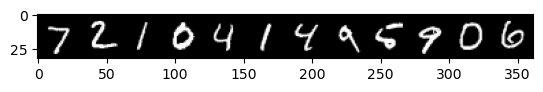

In [19]:


images, labels = next(iter(test_loader))
plt.imshow(np.transpose(torchvision.utils.make_grid(images, nrow=batch_size), (1,2,0)))
print('GroundTruth')
print(" "+ ' '.join('%3s'%label.item() for label in labels))
outputs = model(images)
_,predicted = torch.max(outputs,1)
print("Prediction")
print(" "+' '.join('%3s' %label.item() for label in predicted))


        